In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

In [15]:
# Analitical freshwater Froude number Ff and mixing parameter P
Ff0 = np.linspace(1e-3, 1e0, 1000)
P0 = 0.5 / (Ff ** (2/3))

# Model results
Hs = 12 # sill depth
xloc = 28 # constriction point
B = 9 * 200 # fjord width
Qf = np.linspace(100, 1000, 10) # freshwater discharge
beta = 8e-4 # saline contraction coefficient psu-1
g = 9.8


In [25]:
def hydro_control(filename, Qf, Hs, xloc):
    state0 = xr.open_dataset(filename) 
    t0 = 60 # Start from day 30
    tn = len(state0.T) # End day
    state = state0.isel(Y = range(1,10), T = range(t0,tn)) # Remove the boundary walls in y direction
    s = state.S.data.mean(2).mean(0)
    u0 = state.U.data # dims = T, Z, Y, Xp1
    u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
    u = u_ymean.mean(0)
    # Layer interface, zero velocity crossing point
    u_sill = u[:, xloc]
    l = np.where(u_sill > 0)[-1][-1] + 1
    # Layer index of the sill depth
    ls = np.argwhere(u_sill == 0)[0][0]
    s1 = s[:l, xloc].mean(0)
    s2 = s[l:ls, xloc].mean(0)
    P = s2 / (s2 - s1)   # Mixing parameter
    Ff = Qf / np.sqrt(beta * g * s2 * (B**2) * (Hs**3))
    return (Ff, P)

29629.027928705324

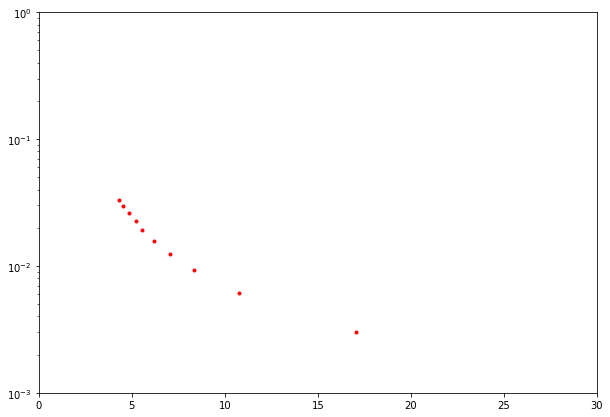

In [38]:
import glob
files = sorted(glob.glob('/Users/weiyangbao/Desktop/sill12/state_*.nc'))

fig, ax =plt.subplots(figsize=(10,7))
ax.set_xlim([0,30])
ax.set_ylim([1e-3,1])
ax.set_yscale('log')
#Ff= np.empty(len(files))
#P = np.empty(len(files))
for i in range(len(files)): 
    Ff, P = hydro_control(files[i], Qf[i], Hs, xloc)
    plt.plot([P],[Ff], marker='o', markersize=3, color='red')


#plt.plot(P,Ff)

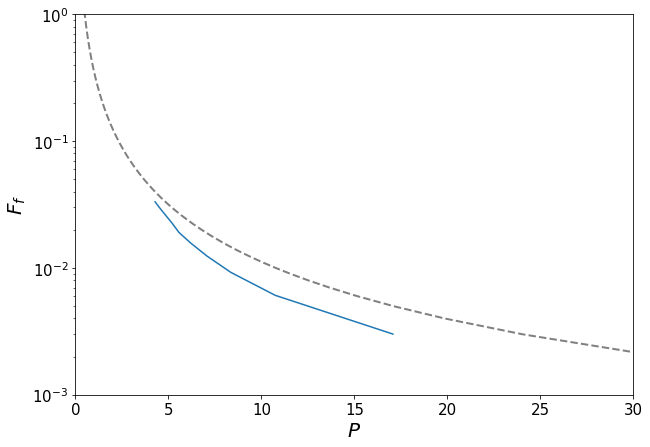

In [32]:
fig, ax =plt.subplots(figsize=(10,7))
ax.set_xlim([0,30])
#ax.set_xticks(np.linspace(0,240,13))
#ax.set_xticklabels(np.linspace(0,120,13, dtype = int), size = 20)
ax.set_ylim([1e-3,1])
ax.set_yscale('log')
#ax.set_yticks(np.linspace(0,4000,9))
#ax.set_yticklabels(np.linspace(0,4000,9, dtype = int), size = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'$P$', size=20, weight='bold')
plt.ylabel(r'$F_f$', size=20, weight='bold')
plt.plot(P0, Ff0, color='gray', linestyle='--', linewidth=2)
plt.plot(P,Ff)

In [8]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

array = np.random.random(10)
print(array)

[0.88962234 0.33795949 0.22846698 0.42738357 0.45899049 0.1850498
 0.4196143  0.51908684 0.24149912 0.17862104]


In [10]:
value = 0.5
print(find_nearest(array, value))

7


In [12]:
array[:7]

array([0.88962234, 0.33795949, 0.22846698, 0.42738357, 0.45899049,
       0.1850498 , 0.4196143 ])